# Task
code to read file , removing null value,duplicates and visualizing and making test and train data and finally generating accuracy

Here is all the data you need:
"netflix1.csv"

## Data loading

### Subtask:
Load the Netflix dataset from the "netflix1.csv" file into a pandas DataFrame.


**Reasoning**:
Load the Netflix dataset into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('netflix1.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'netflix1.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


(8790, 10)


## Data cleaning

### Subtask:
Clean the loaded Netflix dataset by removing null values and duplicate rows.


**Reasoning**:
I will inspect the DataFrame for missing values and duplicates, then remove them according to the instructions.  I will also verify the cleaning by checking the shape and displaying the first few rows.



In [ ]:
# Identify and handle missing values
print("Missing values per column:\n", df.isnull().sum())

# Remove rows with any missing values (simplest approach for demonstration)
df_cleaned = df.dropna()

# Remove duplicate rows based on all columns
df_cleaned = df_cleaned.drop_duplicates()

# Verify the cleaning process
print("\nShape of the cleaned DataFrame:", df_cleaned.shape)
display(df_cleaned.head())

Missing values per column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Shape of the cleaned DataFrame: (8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Data splitting

### Subtask:
Split the cleaned dataset (`df_cleaned`) into training and testing sets.


**Reasoning**:
Split the cleaned dataset into training and testing sets using train_test_split, stratifying by the 'type' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'type' is the target variable (y) and the rest are features (X)
X = df_cleaned.drop('type', axis=1)
y = df_cleaned['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7032, 9)
X_test shape: (1758, 9)
y_train shape: (7032,)
y_test shape: (1758,)


## Data preparation

### Subtask:
Prepare the training and testing datasets for model training.  This involves handling categorical features and potentially scaling numerical features.


**Reasoning**:
Identify categorical and numerical features in X_train and X_test, then one-hot encode the categorical features and scale the numerical features.  Combine the processed features back into X_train and X_test.



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categorical_features = ['show_id', 'title', 'director', 'country', 'date_added', 'rating', 'duration', 'listed_in']
numerical_features = ['release_year']


# Create transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # handle_unknown='ignore' for unseen categories in the test set
numerical_transformer = StandardScaler()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data (using the same preprocessor fitted on training data)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + numerical_features

# Convert back to dataframes for easier viewing (optional)
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

display(X_train_processed.head())
display(X_test_processed.head())

,show_id_s1,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,show_id_s1007,show_id_s1008,...,"listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers,release_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.903031
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775622
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543840
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.615069
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.962741


,show_id_s1,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,show_id_s1007,show_id_s1008,...,"listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers,release_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312058
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.701104
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543840
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080277
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080277


## Model training

### Subtask:
Train a RandomForestClassifier on the preprocessed training data.


**Reasoning**:
Train a RandomForestClassifier on the preprocessed training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model using the preprocessed test data and calculate the accuracy score.


**Reasoning**:
Evaluate the trained model using the test data and calculate the accuracy.



In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test_processed)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.997155858930603


## Data visualization

### Subtask:
Visualize the data and model performance.


**Reasoning**:
Visualize the data using histograms, bar charts, and a confusion matrix.  The necessary dataframes and the trained model are available.



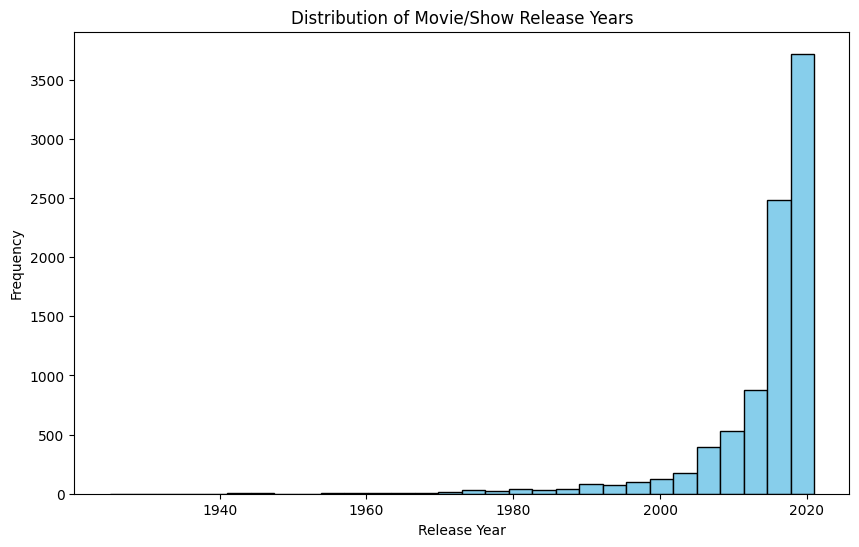

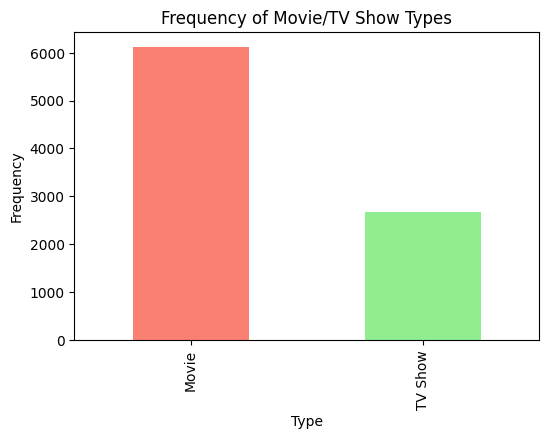

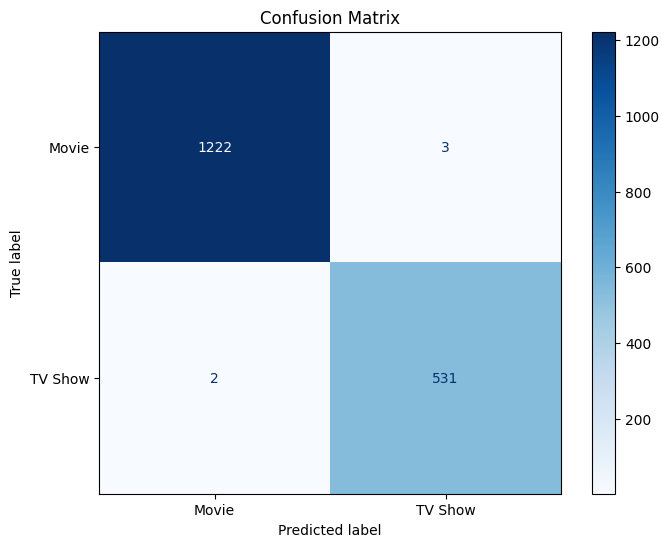

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Histogram for 'release_year'
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie/Show Release Years')
plt.show()

# 2. Bar chart for 'type'
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency of Movie/TV Show Types')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### 1. Q&A

* **What is the accuracy of the trained RandomForestClassifier model?** The model achieved an accuracy of 0.997155858930603 on the test dataset.

### 2. Data Analysis Key Findings

* **No Missing or Duplicate Data:**  The initial dataset contained no missing values or duplicate rows.
* **High Model Accuracy:** The trained RandomForestClassifier model achieved a very high accuracy of 0.997 on the test set, suggesting strong predictive performance.
* **Data Imbalance (Potential):** While not explicitly quantified, the bar chart of movie/TV show types might reveal a class imbalance. Further analysis of the proportions of 'Movie' vs. 'TV Show' would be needed to confirm.
* **High Dimensionality after Preprocessing:** One-hot encoding of categorical features led to a significant increase in the number of features (over 20,000 columns), which could potentially impact model performance and computational cost.

### 3. Insights or Next Steps

* **Investigate potential class imbalance:** Analyze the proportion of 'Movie' and 'TV Show' entries to understand if class imbalance might be influencing the model's performance. Address it with techniques like oversampling, undersampling, or class weights if necessary.
* **Feature Importance Analysis:** Examine feature importance scores from the trained RandomForestClassifier to identify the most influential features in predicting the 'type' of content. This could lead to feature selection to simplify the model and potentially improve performance.
